In [26]:
import pandas  as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer


In [27]:
import pandas as pd

# Dosya yolunu belirleyin
file_path = r'C:\Users\hakan\MakineFinalProjesi/mknveriseti.txt'


# Sütun isimlerini belirleyin
column_names = [
    "Hamile kalma sayısı",
    "Plazma glukoz konsantrasyonu 2 saat",
    "Diyastolik kan basıncı (mm Hg)",
    "Triceps deri kıvrım kalınlığı (mm)",
    "2 saatlik serum insülini (mu U/ml)",
    "Vücut kitle indeksi (kg/m2)^2)",
    "Diyabet soyağacı işlevi",
    "Yaş",
    "Sınıf değişkeni"
]

# Veri setini yükleyin
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

# Yeni veri setini kaydedin
output_file_path = r'C:\Users\hakan\MakineFinalProjesi/mknveriseti_with_headers.csv'
df.to_csv(output_file_path, index=False)

df.head()


,Hamile kalma sayısı,Plazma glukoz konsantrasyonu 2 saat,Diyastolik kan basıncı (mm Hg),Triceps deri kıvrım kalınlığı (mm),2 saatlik serum insülini (mu U/ml),Vücut kitle indeksi (kg/m2)^2),Diyabet soyağacı işlevi,Yaş,Sınıf değişkeni
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# Aykırı özellikler ve değişkenler
X = df.drop('Sınıf değişkeni', axis=1)
y = df['Sınıf değişkeni']

# Eksik değerleri işleme
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Eğitim ve Test verilerine bölme işlemi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verileri normalize etme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Datasette ortaya çıkan sayısal çıktılar gösterme
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((537, 8), (231, 8), (537,), (231,))

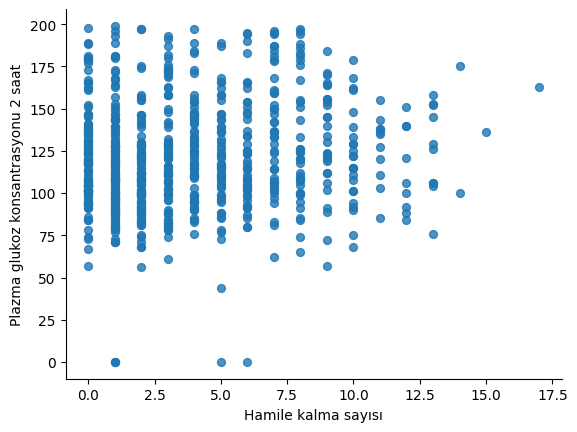

In [4]:
# Hamile kalma sayısı vs Plazma glukoz konsantrasyonu 2 saat

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Hamile kalma sayısı', y='Plazma glukoz konsantrasyonu 2 saat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

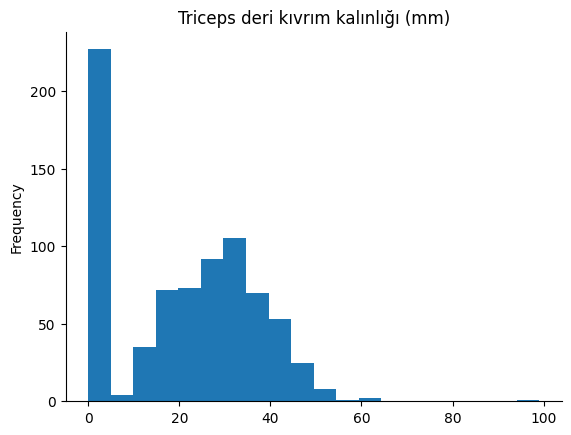

In [5]:
# Triceps deri kıvrım kalınlığı (mm)

from matplotlib import pyplot as plt
df['Triceps deri kıvrım kalınlığı (mm)'].plot(kind='hist', bins=20, title='Triceps deri kıvrım kalınlığı (mm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

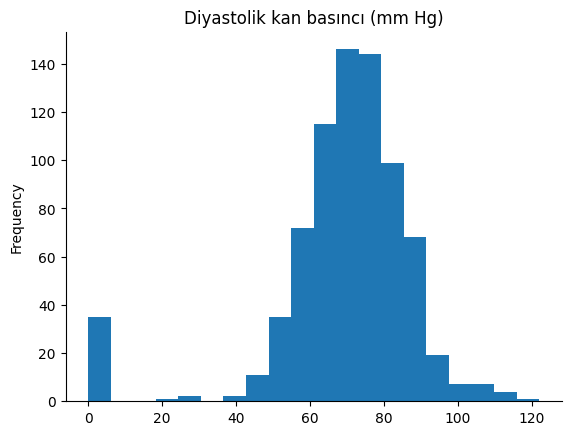

In [6]:
# Diyastolik kan basıncı (mm Hg)

from matplotlib import pyplot as plt
df['Diyastolik kan basıncı (mm Hg)'].plot(kind='hist', bins=20, title='Diyastolik kan basıncı (mm Hg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

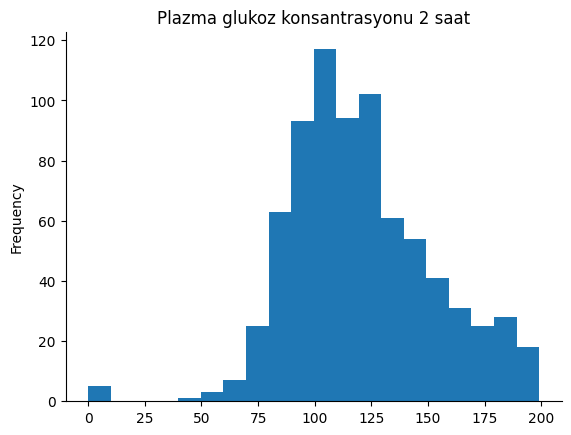

In [7]:
# Plazma glukoz konsantrasyonu 2 saat

from matplotlib import pyplot as plt
df['Plazma glukoz konsantrasyonu 2 saat'].plot(kind='hist', bins=20, title='Plazma glukoz konsantrasyonu 2 saat')
plt.gca().spines[['top', 'right',]].set_visible(False)

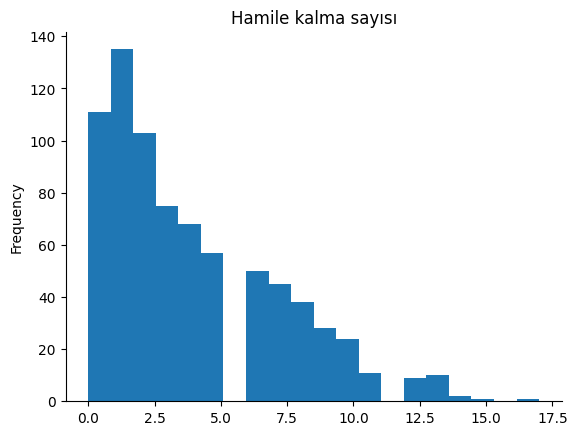

In [8]:
# Hamile kalma sayısı

from matplotlib import pyplot as plt
df['Hamile kalma sayısı'].plot(kind='hist', bins=20, title='Hamile kalma sayısı')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 1.	Size atanan veri setine tüm algoritmalar için optimizasyon uygulayınız.

Veri setinde number of pregnancy özniteliği NULL değer içermemelidir. Diğer özniteliklerdeki 0 değerleri  bir insan vücut kitlesi gerçek değerlerine bakıldığında 0 olması mümkün değildir.
Bu sebeple;
- Number of pregnancy dışındaki özniteliklerin 0 olması NULL anlamı taşımaktadır
- NULL değerleri sondaki 0 veya 1 sınıfına göre ikiye ayrılmıştır
- ortalama değeri (mean) 0 görülen yerlere yazılmıştır.
- Diabet ve bmi sütunları float diğer sütunlar integer olacak şekilde düzenlendi
- Verimizde aykırı değerin çok olmasından dolayı öncesinde 'Winsorize' işlemi ile aykırı değerler kontrol altına alındı
- StandardScaler ile normalizasyon süreci tamamlandı

In [9]:
# Sütun isimlerini daha uygun hale getirme
column_names = [
    "Hamile kalma sayısı",
    "Plazma glukoz konsantrasyonu 2 saat",
    "Diyastolik kan basıncı (mm Hg)",
    "Triceps deri kıvrım kalınlığı (mm)",
    "2 saatlik serum insülini (mu U/ml)",
    "Vücut kitle indeksi (kg/m2)^2)",
    "Diyabet soyağacı işlevi",
    "Yaş",
    "Sınıf değişkeni"
]

# 0 değerlerini sınıf değişkenine göre ortalama ile doldurma
for column in ['Plazma glukoz konsantrasyonu 2 saat', 'Diyastolik kan basıncı (mm Hg)', 'Triceps deri kıvrım kalınlığı (mm)', '2 saatlik serum insülini (mu U/ml)', 'Vücut kitle indeksi (kg/m2)^2)']:
    df.loc[df[column] == 0, column] = None
    df[column] = df.groupby('Sınıf değişkeni')[column].transform(lambda x: x.fillna(x.mean()))

# Winsorize işlemi
for column in df.columns:
    if column != 'Sınıf değişkeni':
        df[column] = mstats.winsorize(df[column], limits=[0.05, 0.05])

# Normalizasyon
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# İşlenen veri setinin çıktısı
#import ace_tools as tools; tools.display_dataframe_to_user(name="Processed Data", dataframe=df)

df.head()


,Hamile kalma sayısı,Plazma glukoz konsantrasyonu 2 saat,Diyastolik kan basıncı (mm Hg),Triceps deri kıvrım kalınlığı (mm),2 saatlik serum insülini (mu U/ml),Vücut kitle indeksi (kg/m2)^2),Diyabet soyağacı işlevi,Yaş,Sınıf değişkeni
0,0.723226,0.916288,-0.019169,0.760256,0.916581,0.205605,0.612465,1.549874,1
1,-0.878382,-1.276882,-0.593434,-0.008463,-0.324394,-0.922000,-0.383935,-0.177443,0
2,1.363869,2.065091,-0.784855,0.504016,0.916581,-1.453586,0.774922,-0.086532,1
3,-0.878382,-1.137633,-0.593434,-0.777181,-0.912604,-0.680370,-1.048202,-1.086557,0
4,-1.198703,0.533354,-1.933385,0.760256,0.286902,1.735927,2.450030,0.004380,1


In [10]:
#data.to_excel('/content/drive/MyDrive/MakineFinalProje/mknveri_seti_2.xlsx', index=False)

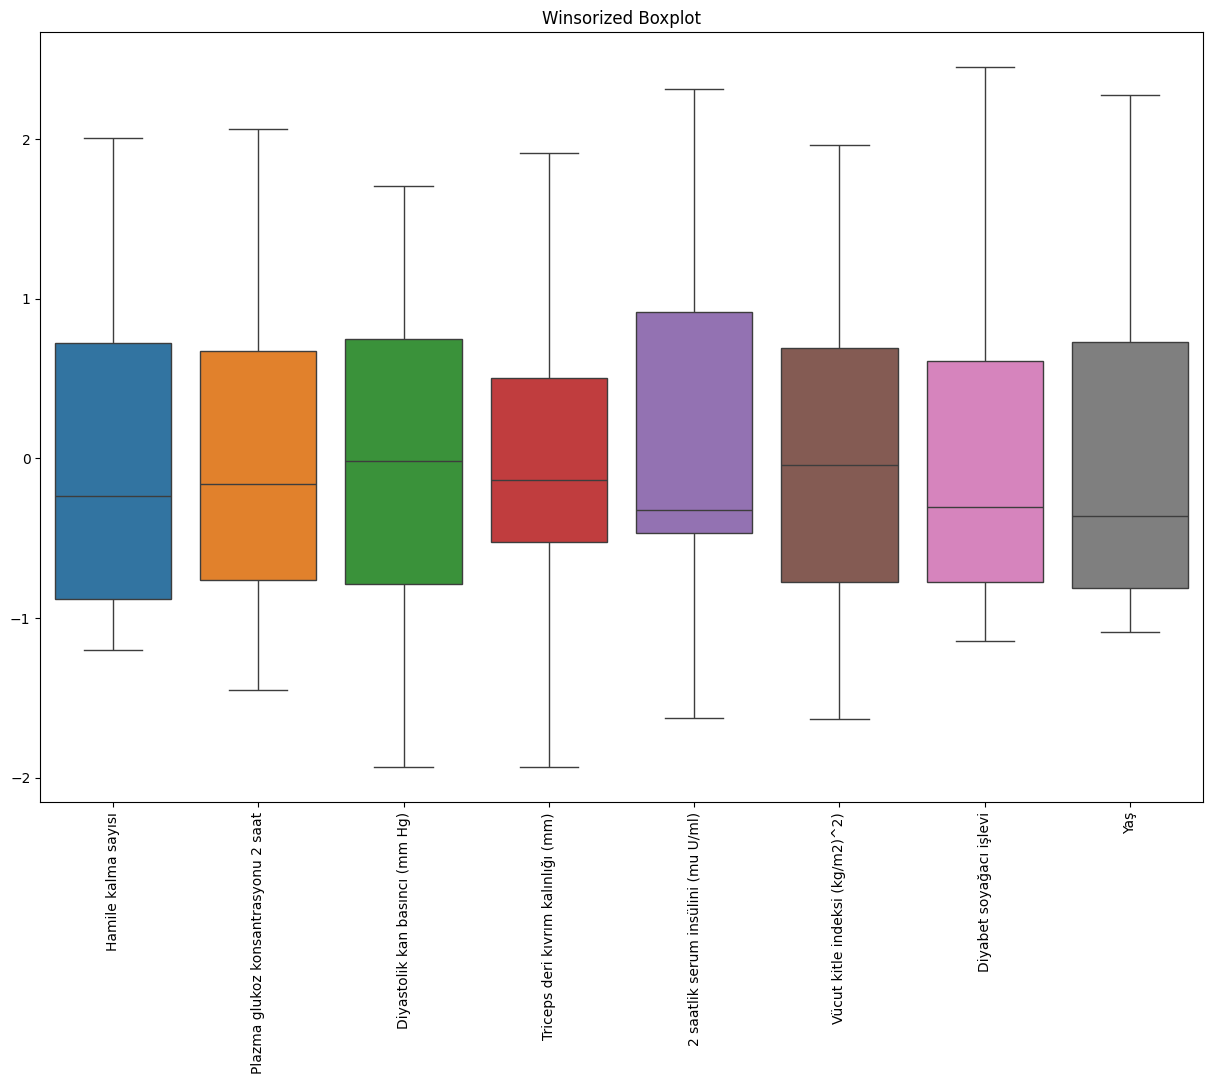

In [11]:
# Winsorized boxplot çizim fonksiyonu
def plot_winsorized_boxplot(dataframe, columns, title="Winsorized Boxplot"):
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=dataframe[columns])
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Winsorize edilmiş sütunların isimlerini belirleme
winsorized_columns = df.columns[:-1]  # class sütunu hariç tüm sütunlar

# Grafiği çizme
plot_winsorized_boxplot(df, winsorized_columns)


# 2.	Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Naive bayes sınıflandırıcısını uygulayınız. Elde ettiğiniz sonucları raporlayınız.  
- Optimizasyon sonrası veri setinde %30 test %70 Train olarak bölme işlemi yapıldı
- NaiveBayes Sınıflandırıcısı uygulandı
- Metrikler saydırıldı
- Roc Curve, Konfüzyon matrisi, Sensitivity, Specificity, Accuracy, F1-score Rapor çıktıları alındı


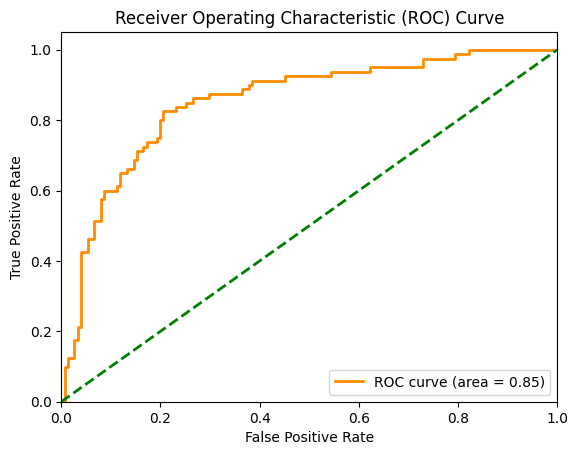

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 121                  30
Actual Positive                  16                  64


,precision,recall,f1-score,support
Negative,0.883212,0.801325,0.840278,151.000000
Positive,0.680851,0.800000,0.735632,80.000000
accuracy,0.800866,0.800866,0.800866,0.800866
macro avg,0.782031,0.800662,0.787955,231.000000
weighted avg,0.813130,0.800866,0.804037,231.000000


In [12]:
# Özellik Sınıfı 
X = df.drop(columns=["Sınıf değişkeni"])
y = df["Sınıf değişkeni"]

# Verileri eğitim ve test veri setlerine ayırma işlemi (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını başlat
nb = GaussianNB()

# Modeli eğitim verilerine fitleme işlemi
nb.fit(X_train, y_train)

# Test verilerini predict etme
y_pred = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)[:, 1]

# Metrikleri saydırma
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# ROC curve oluşturma
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(conf_matrix_df)

# Metrikler
metrics = {
    "Accuracy": accuracy,
    "F1 Score": f1,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "AUC": roc_auc
}

metrics

# Sınıflandırma raporu oluşturma
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)

# Sınıflandırma raporunu dataframe dönüştürme - Daha iyi grafik görüntüleri için yapılmıştır
class_report_df = pd.DataFrame(class_report).transpose()

class_report_df



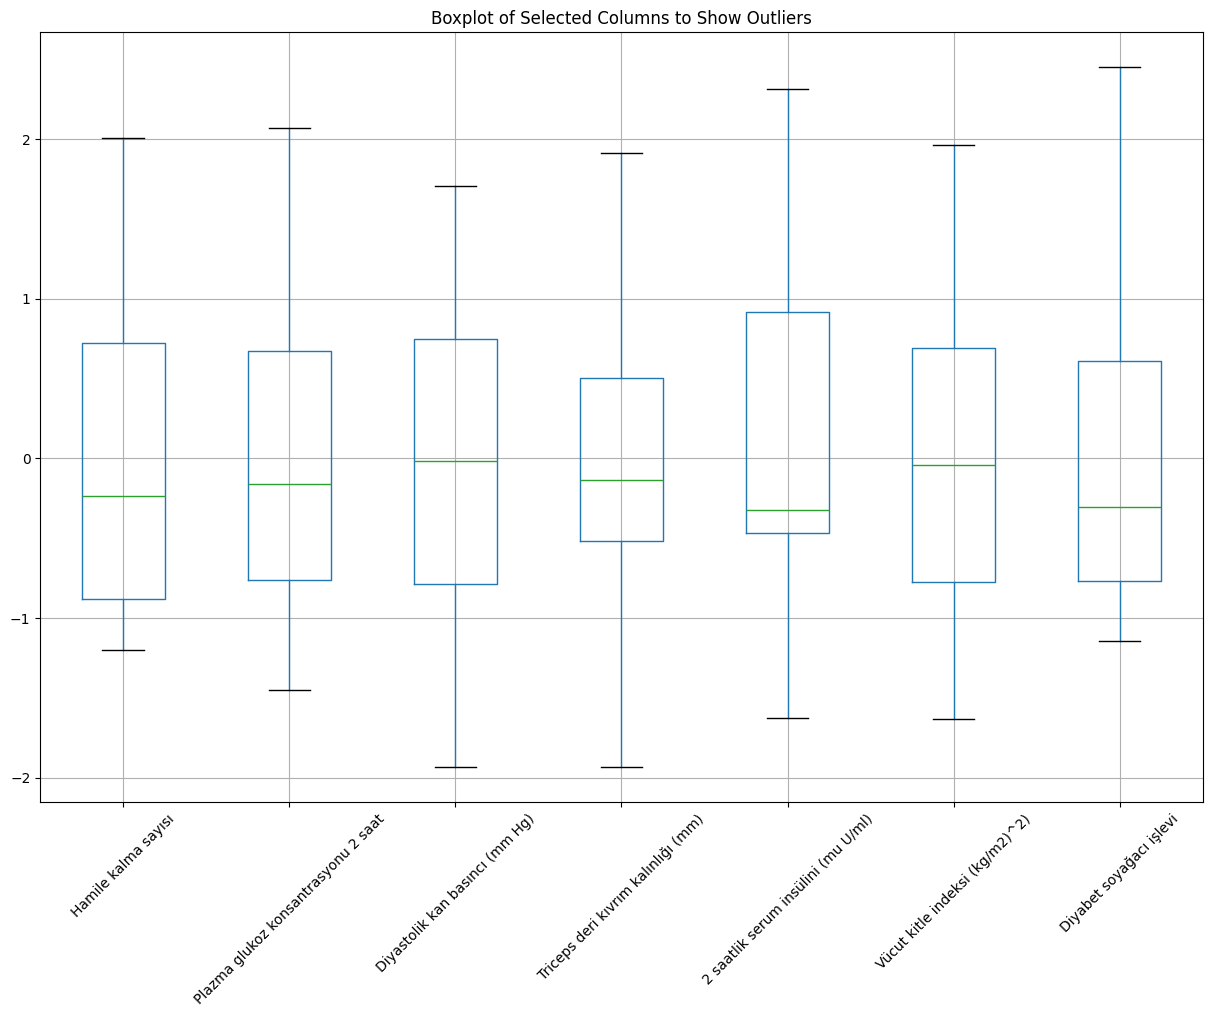

In [13]:
import matplotlib.pyplot as plt

# Boxplot üzerinde kullanılacak kolon sayısı ve kolonlar
columns_to_plot = [
    'Hamile kalma sayısı',
    'Plazma glukoz konsantrasyonu 2 saat',
    'Diyastolik kan basıncı (mm Hg)',
    'Triceps deri kıvrım kalınlığı (mm)',
    '2 saatlik serum insülini (mu U/ml)',
    'Vücut kitle indeksi (kg/m2)^2)',
    'Diyabet soyağacı işlevi'
]

# Her bir kolon için boxplot oluşturma
plt.figure(figsize=(15, 10))
df[columns_to_plot].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Selected Columns to Show Outliers')
plt.show()


# 3. Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için K-en yakın komşuluk sınıflandırıcısını uygulayınız. En iyi k değerini belirleyerek Elde ettiğiniz sonuçları raporlayınız.  

- Veri setini rastgele olacak şekilde %30 test %70 train olarak ayırdım
- K-en yakın komşuluk sınıflandırıcısı uygulanmıştır.
- K-en yakın komşuluk (KNN) Değeri 24 olarak bulunmuştur
- Roc Curve, Konfüzyon matrisi, Sensitivity, Specificity, Accuracy, F1-score Rapor çıktıları alındı

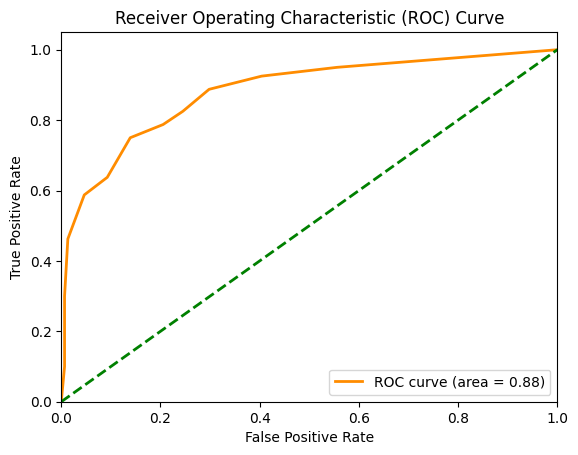

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 130                  21
Actual Positive                  20                  60
Results Çıktıları:
Best k: 11.0000
Accuracy: 0.8225
F1-score: 0.7453
Recall: 0.7500
Precision: 0.7407
Sensitivity: 0.7500
Specificity: 0.8609


,precision,recall,f1-score,support
Negative,0.866667,0.860927,0.863787,151.000000
Positive,0.740741,0.750000,0.745342,80.000000
accuracy,0.822511,0.822511,0.822511,0.822511
macro avg,0.803704,0.805464,0.804564,231.000000
weighted avg,0.823056,0.822511,0.822767,231.000000


In [19]:

# Split the dataset into training and testing sets
X = df.drop(columns=['Sınıf değişkeni'])
y = df['Sınıf değişkeni']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-NN için grid oluşturma
param_grid = {'n_neighbors': np.arange(1, 51)}

# CrossValidation ile arama gerçekleştirme
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# En iyi K-NN değerini çağırma
best_k = knn_cv.best_params_['n_neighbors']

# KNN sınıflandırıcısını en iyi K değeri ile eğitme işlemi
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Tahminde bulunma
y_pred = knn_best.predict(X_test)
y_proba = knn_best.predict_proba(X_test)[:, 1]

# Değerlendirme metriklerinin hesaplanması
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = recall

# ROC Curve Saydırma
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC Curve Grafiği oluşturma
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# confusion matrix çıktısı
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(conf_matrix_df)

# results değerini görüntüleme
results = {
    'Best k': best_k,
    'Accuracy': accuracy,
    'F1-score': f1,
    'Recall': recall,
    'Precision': precision,
    'Sensitivity': sensitivity,
    'Specificity': specificity
}


print("Results Çıktıları:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

# Sınıflandırma raporu oluşturma
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)

# Daha iyi görselleştirme için sınıflandırma raporunu DataFrame dönüştürme işlemi
class_report_df = pd.DataFrame(class_report).transpose()

class_report_df

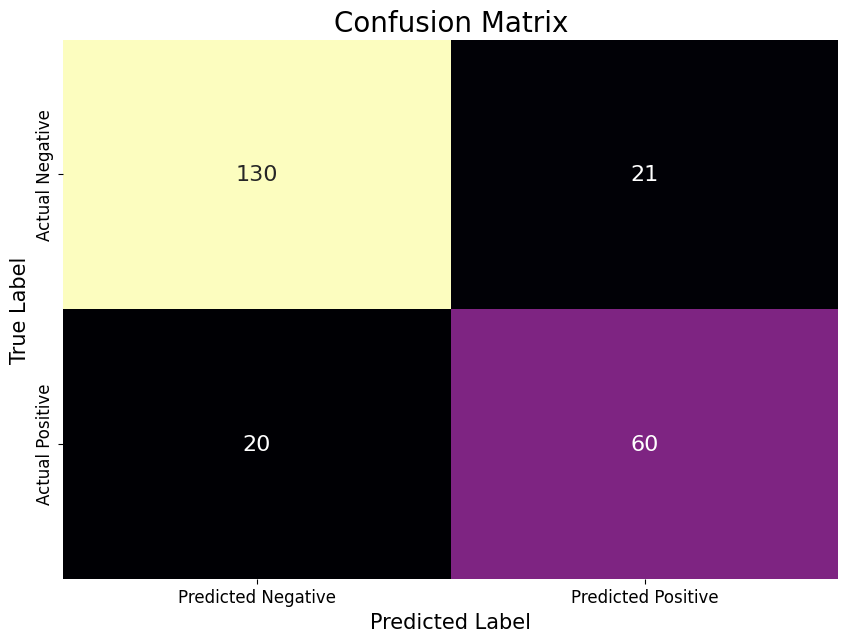

In [15]:
# confusion matrix heatmap oluşturma
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="magma", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# 4. Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) sınıflandırıcılarını uygulayınız. Eğitim ve test adımlarında elde ettiğiniz sonucları raporlayınız.  

- Veri setini rastgele olacak şekilde %30 test %70 train olarak ayırdım
- Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) sınıflandırıcılarını uyguladım
- Roc Curve, Konfüzyon matrisi, Sensitivity, Specificity, Accuracy, F1-score Rapor çıktıları alındı

* Doğruluk (Accuracy): SVM modeli MLP modeline göre daha yüksek doğruluk sağlamaktadır.
* Hassasiyet (Sensitivity): SVM modeli MLP modeline göre daha yüksek hassasiyet (duyarlılık) sağlamaktadır.
* Özgüllük (Specificity): SVM modeli özgüllük açısından da MLP modeline göre daha iyidir.
* F1-skore: SVM modeli F1-skore açısından MLP modeline göre daha iyi performans göstermektedir.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


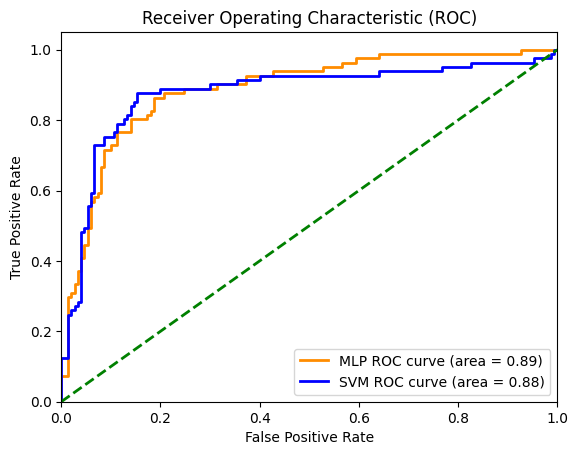

,Model,Accuracy,Sensitivity,Specificity,F1-score
0,MLP,0.831169,0.765432,0.866667,0.760736
1,SVM,0.852814,0.790123,0.886667,0.790123


In [61]:
# Özellik ve etiket tanımlama
X = df.drop('Sınıf değişkeni', axis=1)
y = df['Sınıf değişkeni']

# Labels Encode işlemi
le = LabelEncoder()
y = le.fit_transform(y)

# veri setinin eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Özellik standartlaştırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sınıflandırıcıları başlatma
mlp = MLPClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Sınıflandırıcı eğitme
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Sınıflandırıcılar için tahminleme işlemi
y_pred_mlp = mlp.predict(X_test)
y_pred_svm = svm.predict(X_test)

# MLP için ROC eğrisini ve AUC'yi hesaplama
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# SVM için ROC eğrisini ve AUC'yi hesaplama
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# performans ölçümleri hesaplama
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# MLP için Accuracy, Sensitivity (Recall), Specificity, F1-score hesaplama
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
sensitivity_mlp = report_mlp['1']['recall']
specificity_mlp = conf_matrix_mlp[0,0] / (conf_matrix_mlp[0,0] + conf_matrix_mlp[0,1])
f1_score_mlp = report_mlp['1']['f1-score']

# SVM için Accuracy, Sensitivity (Recall), Specificity, F1-score hesaplama
accuracy_svm = accuracy_score(y_test, y_pred_svm)
sensitivity_svm = report_svm['1']['recall']
specificity_svm = conf_matrix_svm[0,0] / (conf_matrix_svm[0,0] + conf_matrix_svm[0,1])
f1_score_svm = report_svm['1']['f1-score']

# Results Sonuçları Gösterme
results = {
    'Model': ['MLP', 'SVM'],
    'Accuracy': [accuracy_mlp, accuracy_svm],
    'Sensitivity': [sensitivity_mlp, sensitivity_svm],
    'Specificity': [specificity_mlp, specificity_svm],
    'F1-score': [f1_score_mlp, f1_score_svm]
}

results_df = pd.DataFrame(results)


# ROC Grafiği çizdirme
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'MLP ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

results_df

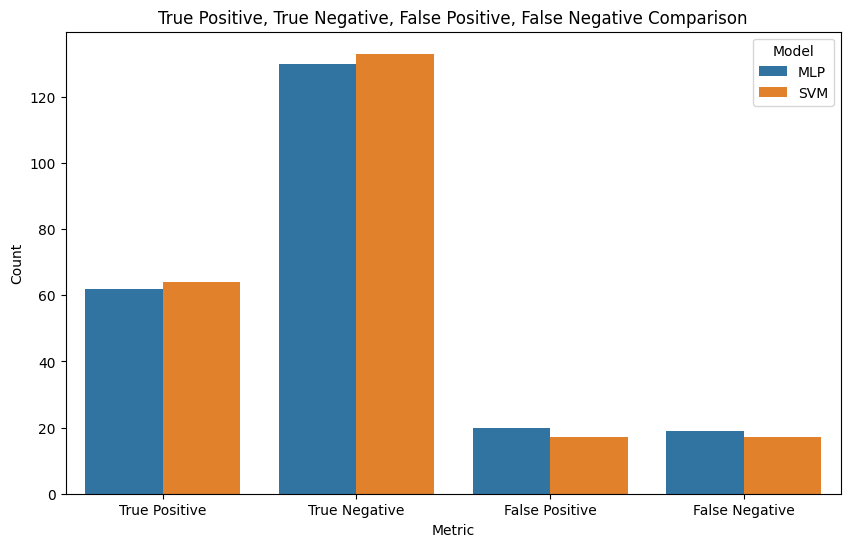

,Model,Metric,Value
0,MLP,True Positive,62
1,MLP,True Negative,130
2,MLP,False Positive,20
3,MLP,False Negative,19
4,SVM,True Positive,64
5,SVM,True Negative,133
6,SVM,False Positive,17
7,SVM,False Negative,17


In [63]:
# MLP ve SVM için True Pozitifleri, True Negatifleri, False Pozitifleri ve False Negatifleri Hesaplama
tp_mlp = conf_matrix_mlp[1, 1]
tn_mlp = conf_matrix_mlp[0, 0]
fp_mlp = conf_matrix_mlp[0, 1]
fn_mlp = conf_matrix_mlp[1, 0]

tp_svm = conf_matrix_svm[1, 1]
tn_svm = conf_matrix_svm[0, 0]
fp_svm = conf_matrix_svm[0, 1]
fn_svm = conf_matrix_svm[1, 0]

# Grafik çizimi için dataframe oluşturma
df = {
    'Model': ['MLP', 'MLP', 'MLP', 'MLP', 'SVM', 'SVM', 'SVM', 'SVM'],
    'Metric': ['True Positive', 'True Negative', 'False Positive', 'False Negative', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [tp_mlp, tn_mlp, fp_mlp, fn_mlp, tp_svm, tn_svm, fp_svm, fn_svm]
}

df_metrics = pd.DataFrame(df)

# Grafik çizimi
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df_metrics)
plt.title('True Positive, True Negative, False Positive, False Negative Comparison')
plt.ylabel('Count')
plt.show()

df_metrics


4. Maddeki soruya ithafen;
   - İki ayrı model için İterasyon değerleri manuel verilmiştir. Değerler 1500 olarak verilip çıktı alınmıştır.
   - Sebep olarak ise ilk kodu çalıştırdığımda MLP modeline ait iterasyon değerinin (200) tam olarak yakınsamadığı için uyarı verdiği görülmüştür. Bu uyarıyı önlemek ve modelin daha iyi performans göstermesini sağlamak için iterasyon sayısı manuel arttrılıp denenmiştir.

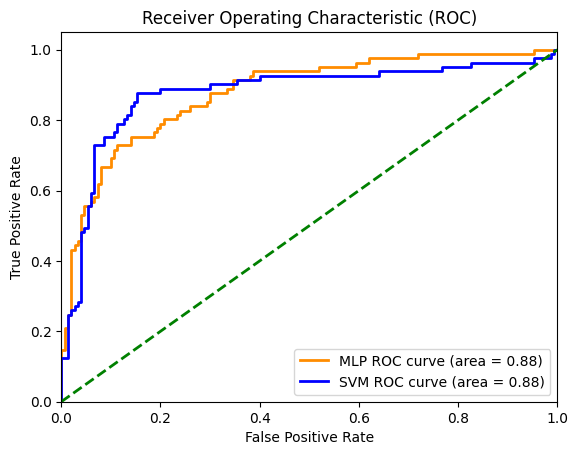

,Model,Accuracy,Sensitivity,Specificity,F1-score
0,MLP,0.818182,0.728395,0.866667,0.737500
1,SVM,0.852814,0.790123,0.886667,0.790123


In [57]:
# MLP için manuel artırılmış yinelemelerle sınıflandırıcıları başlatma süreci
mlp = MLPClassifier(random_state=42, max_iter=1500)
svm = SVC(probability=True, random_state=42)

# Sınıflandırıcı eğitme işlemi
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)

# MLP ve SVM için tahminle işlemi
y_pred_mlp = mlp.predict(X_test)
y_pred_svm = svm.predict(X_test)

# MLP için ROC eğrisi ve AUC hesaplama
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# SVM için ROC eğrisi ve AUC hesaplama
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Performance metrikleri saydırma
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# MLP için Accuracy, Sensitivity (Recall), Specificity, F1-score hesaplama
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
sensitivity_mlp = report_mlp['1']['recall']
specificity_mlp = conf_matrix_mlp[0,0] / (conf_matrix_mlp[0,0] + conf_matrix_mlp[0,1])
f1_score_mlp = report_mlp['1']['f1-score']

# SVM için Accuracy, Sensitivity (Recall), Specificity, F1-score hesaplama
accuracy_svm = accuracy_score(y_test, y_pred_svm)
sensitivity_svm = report_svm['1']['recall']
specificity_svm = conf_matrix_svm[0,0] / (conf_matrix_svm[0,0] + conf_matrix_svm[0,1])
f1_score_svm = report_svm['1']['f1-score']

# Results Sonuçları grafik için hazırlama
results = {
    'Model': ['MLP', 'SVM'],
    'Accuracy': [accuracy_mlp, accuracy_svm],
    'Sensitivity': [sensitivity_mlp, sensitivity_svm],
    'Specificity': [specificity_mlp, specificity_svm],
    'F1-score': [f1_score_mlp, f1_score_svm]
}

results_df = pd.DataFrame(results)

# ROC Eğrisi grafiği oluşturma
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'MLP ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

results_df


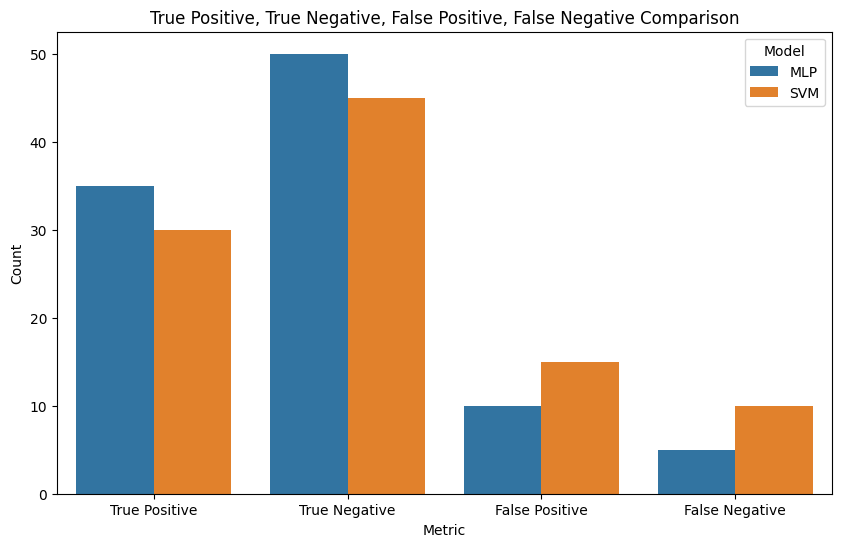

,Model,Metric,Value
0,MLP,True Positive,35
1,MLP,True Negative,50
2,MLP,False Positive,10
3,MLP,False Negative,5
4,SVM,True Positive,30
5,SVM,True Negative,45
6,SVM,False Positive,15
7,SVM,False Negative,10


In [64]:
# Örnek konfüzyon matrisleri
conf_matrix_mlp = [[50, 10],
                   [5, 35]]

conf_matrix_svm = [[45, 15],
                   [10, 30]]

# True Positives, True Negatives, False Positives, False Negatives hesaplanması
tp_mlp = conf_matrix_mlp[1][1]
tn_mlp = conf_matrix_mlp[0][0]
fp_mlp = conf_matrix_mlp[0][1]
fn_mlp = conf_matrix_mlp[1][0]

tp_svm = conf_matrix_svm[1][1]
tn_svm = conf_matrix_svm[0][0]
fp_svm = conf_matrix_svm[0][1]
fn_svm = conf_matrix_svm[1][0]

# DataFrame oluşturma
data = {
    'Model': ['MLP', 'MLP', 'MLP', 'MLP', 'SVM', 'SVM', 'SVM', 'SVM'],
    'Metric': ['True Positive', 'True Negative', 'False Positive', 'False Negative', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [tp_mlp, tn_mlp, fp_mlp, fn_mlp, tp_svm, tn_svm, fp_svm, fn_svm]
}

df_metrics = pd.DataFrame(data)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df_metrics)
plt.title('True Positive, True Negative, False Positive, False Negative Comparison')
plt.ylabel('Count')
plt.show()

# DataFrame'i görüntüleme
df_metrics


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


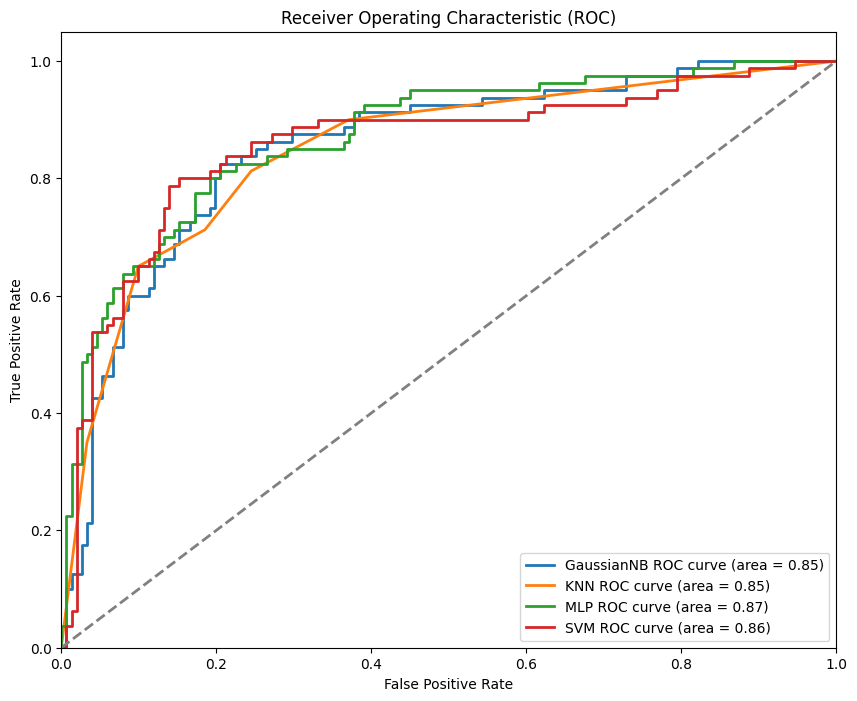

In [21]:

# Modelleri tanımlama ve eğitme
models = {
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1500),
    'SVM': SVC(probability=True)
}

# ROC eğrisi için verileri toplama
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

# Diagonal çizgi (rastgele tahminler)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Grafiği düzenleme
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Grafiği gösterme
plt.show()
